In [117]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
from scipy.optimize import curve_fit

In [118]:
path = os.getcwd()
csv_files = glob.glob(os.path.join(path, "*.csv"))

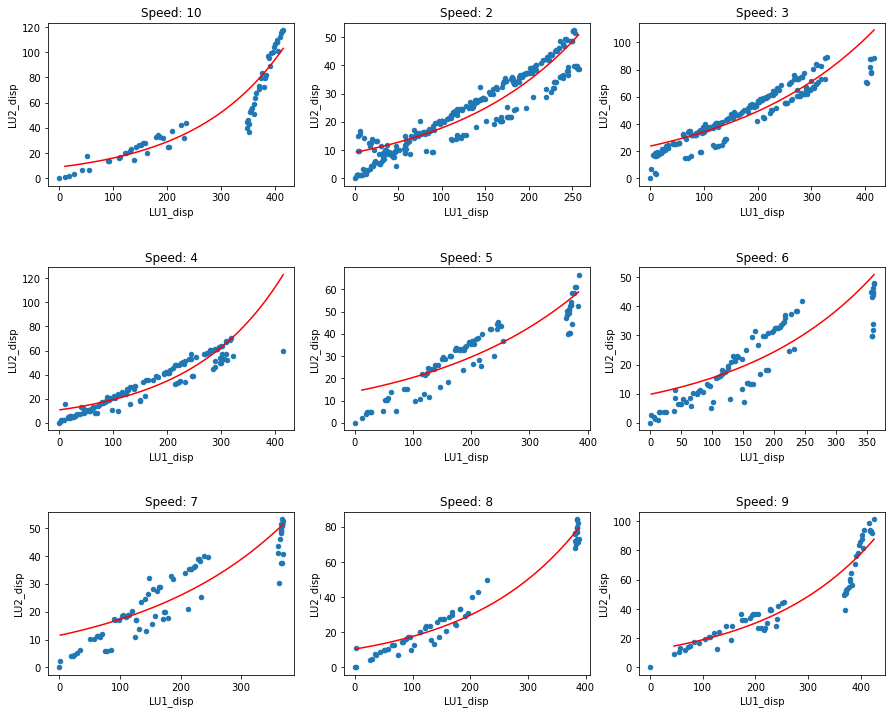

In [120]:
fig, axs = plt.subplots(nrows=math.ceil(len(csv_files)/3), ncols=3, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)

for f, ax in zip(csv_files, axs.ravel()):
      
    # read the csv file
    df = pd.read_csv(f)
    df = df[(df["LU1 x"] != 0) & (df["LU1 y"] != 0) & (df["LU1 th"] != 0) & (df["LU2 x"] != 0) & (df["LU2 y"] != 0) & (df["LU2 th"] != 0)]
    df = df.reset_index(drop=True)
#     df["Speed"] = f[f.rfind('_')+1:f.rfind('.')]

    df["LU1_disp"] = np.sqrt(np.square(df.iloc[:,1:4] - df.iloc[0,1:4]).sum(axis=1))
    df["LU2_disp"] = np.sqrt(np.square(df.iloc[:,4:7] - df.iloc[0,4:7]).sum(axis=1))
    
    x = df.LU1_disp[1:].values
    y = df.LU2_disp[1:].values
    
    #calculate equation for trendline
    p = np.polyfit(x, np.log(y), 1, w=np.sqrt(y))
    
    # Convert the polynomial back into an exponential
    a = np.exp(p[1])
    b = p[0]
    x_fitted = np.linspace(np.min(x), np.max(x), 100)
    y_fitted = a * np.exp(b * x_fitted)
    
    df.plot.scatter(x='LU1_disp', y='LU2_disp', ax=ax)
    ax.plot(x_fitted, y_fitted, 'r')
    ax.set_title("Speed: " + f[f.rfind('_')+1:f.rfind('.')])
#     ax.get_legend().remove()
#     ax.set_xlabel("")

#     display(df)
      
